## Searching

[<img align="right" src="img/robot_and_ball.jpg" />](http://www.hongkiat.com/blog/danbo-amazon-cardboard-robot-photos/)
The first step of the manipulation task is searching for the object (the blue ball) and moving the robot near to it, so that the ball fits between the gripper fingers.

This task is very similar to the visually-guided line-following task, since the ball is brightly colored and it can be [segmented](https://en.wikipedia.org/wiki/Image_segmentation) from the background with some simple image processing operations. Then, the robot can be controlled for approaching the ball.

A possible algorithm would be:

    1. open the gripper and tilt the kinect for searching the ball
    2. turn the robot until the ball is centered in the camera image
    3. move the robot forward until the ball is near the bottom of the image
    
First, let's initialize the robot.

In [19]:
import packages.initialization
import pioneer3dx as p3dx
p3dx.init()

### Colored blob detection
We already know how to locate a colored blob (the line in the previous week, the ball now) in the image, thanks to its **centroid**, which is computed from the image moments. But we should also consider the case that the ball is *not visible* in the image. One solution is checking the **area** of the blob, which is given by $M_{00}$, and returning the centroid values only if the area is greater than zero.

Let's define a function named `color_blob` for computing the area and centroid of a colored blob. If the blob is not detected, the area will be zero, and the centroid coordinates will be `None` (the Python value for null). This function is an improved version of the code used for the line following task.

In [20]:
import cv2
def color_blob():
    hsv = cv2.cvtColor(p3dx.image, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    M = cv2.moments(mask)
    area = M['m00']
    if area > 0:
        cx = int(M['m10']/area)
        cy = int(M['m01']/area)
    else:
        cx = None
        cy = None
    return area, cx, cy

## Step 1: initial position

Open the gripper and tilt the kinect for searching the ball: the fingers should be wide open, the gripper down close to the ground, and the kinect should be tilted properly for searching throughout the room.

In [22]:
p3dx.gripper(0.05,0.1)
p3dx.tilt(-0.38)

In a good configuration, the top plate of the robot would be only slightly visible at the bottom of the image, and the walls of the room should be visible too (that is the robot should not be neither looking too much to the floor, nor to the ceiling). You may check the image in the next cell, and change the above parameters if necessary, until the result is satisfactory.

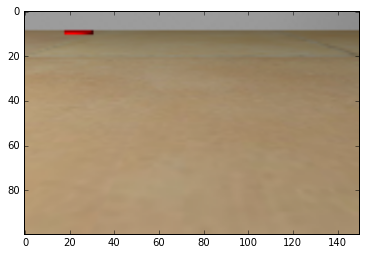

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(p3dx.image);

## Step 2: turning

We are going to use a `while` loop for turning the robot, which will stop when the blob is detected and its coordinates are approximately in the center of the image. Most of the code is given in the next cell, but you must figure out some values.

* First, since the color of the ball is blue, you need to find out its proper **hue** value (please remember that the hue range in OpenCV scales from 0 to 180).

In [23]:
import numpy
lower = numpy.array([110, 100, 100])
upper = numpy.array([130, 255, 255])

* Next, you should choose the interval for considering the blob as centered.

In [24]:
def is_blob_centered():
    area, cx, cy = color_blob()
    if area > 0 and cx >= 70 and cx < 80:
        return True
    else:
        return False

* Finally, you must provide the velocity values for turning.

In [25]:
while not is_blob_centered():
    p3dx.move(-0.5,0.5)
p3dx.stop()

Again, you can check the result:

Area: 18105, cx: 75, cy: 21


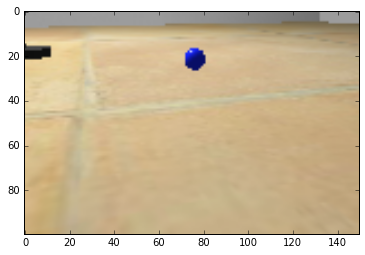

In [9]:
plt.imshow(p3dx.image)
print('Area: %d, cx: %d, cy: %d' % color_blob())

## Step 3: approaching

As the robot moves forward and approaches to the ball, the position of the ball in the image will go down.

We can define a threshold for stopping the robot before the ball goes out of the image. The code is very similar to the previous step.

In [28]:
def is_blob_close():
    area, cx, cy = color_blob()
    if area > 0 and cy >= 92:
        return True
    else:
        return False

In [29]:
while not is_blob_close():
    p3dx.move(1.0,1.0)
p3dx.stop()

Let's check the result:

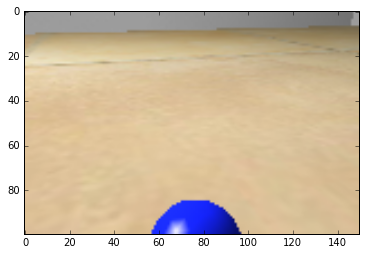

In [14]:
plt.imshow(p3dx.image);

## Additional step: fine motion

If the ball is not between the fingers yet, you need to move the robot closer. This can be done in open loop, but this is prone to errors. A better option is to tilt the kinect lower, and repeat a new iteration of the centering and approaching steps.

In [31]:
p3dx.tilt(-0.47)

In [32]:
while not is_blob_centered():
    p3dx.move(-0.5,0.5)
p3dx.stop()

In [33]:
while not is_blob_close():
    p3dx.move(1.0,1.0)
p3dx.stop()

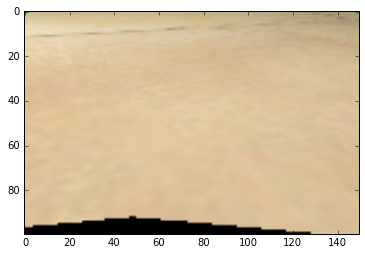

In [18]:
plt.imshow(p3dx.image);

Next: [Grasping](Grasping.ipynb)

---
#### Try-a-Bot: an open source guide for robot programming
Developed by:
[![Robotic Intelligence Lab @ UJI](img/logo/robinlab.png "Robotic Intelligence Lab @ UJI")](http://robinlab.uji.es)

Sponsored by:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="http://www.ieee-ras.org"><img src="img/logo/ras.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.cyberbotics.com"><img src="img/logo/cyberbotics.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.theconstructsim.com"><img src="img/logo/theconstruct.png"></a>
</td>
</tr>
</table>

Follow us:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="https://www.facebook.com/RobotProgrammingNetwork"><img src="img/logo/facebook.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="https://www.youtube.com/user/robotprogrammingnet"><img src="img/logo/youtube.png"></a>
</td>
</tr>
</table>